# Import libraries
U know... just importing required libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets as gds

# Setup the csv path of a dataset
Please cheak the csv sample form from 'Dataset/csv/wiki_dataset.csv' to avoid unexpected results OuOb.

In [2]:

path = '../../Dataset/csv/wiki_dataset.csv'
df = pd.read_csv(path, delimiter=',', skiprows=0, low_memory=False)

# Convert coordinates to floating points
e.g. (24.7867056°N,120.9982944°E) -> (+24.7867056,+120.9982944)

In [3]:
def coor_to_num(xy):
    x, sign_x = xy[0], 0
    y, sign_y = xy[1], 0
    if pd.isna(x) or pd.isna(y): return [-180,-90]
    
    if x[-1] == 'E': sign_x =  1
    if x[-1] == 'W': sign_x = -1
    if y[-1] == 'N': sign_y =  1
    if y[-1] == 'S': sign_y = -1
    
    x = sign_x * float(x[:-2])
    y = sign_y * float(y[:-2])
    return [x,y]

# Show the distribution of coordinates on a map
Show each location from pictures, according to their longitudes and latitudes.

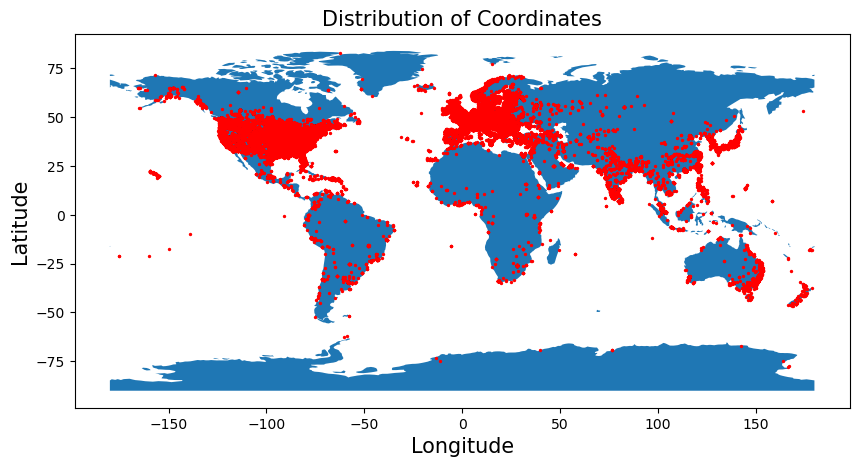

In [4]:
geometry = [Point(coor_to_num(xy)) for xy in zip(df['Longitude'], df['Latitude'])]
world = gpd.read_file(gds.data.naturalearth.land['url'])
gdf = GeoDataFrame(df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 6))

world.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=2)

ax.set_title('Distribution of Coordinates', fontsize=15)
ax.set_xlabel('Longitude', fontsize=15)
ax.set_ylabel('Latitude', fontsize=15)

plt.show()


# Show the distribution of building years
Plot a histogram to visualize building years.

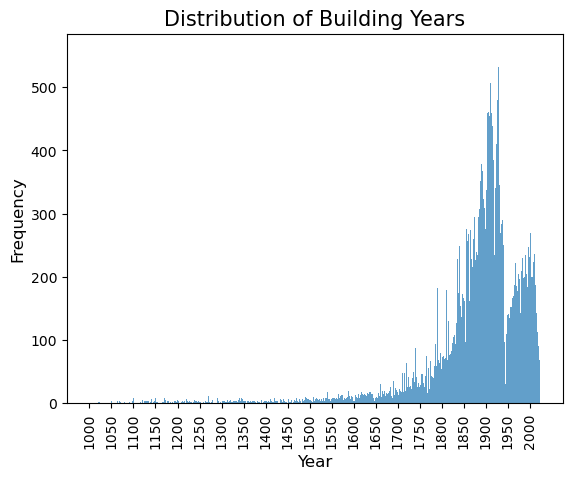

In [5]:
years = df['Year']
plt.hist(years,bins=range(1000,2024+1),alpha=0.7)
plt.xticks(np.arange(1000, 2024+1, 50),rotation='vertical')

plt.title('Distribution of Building Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()